# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly
import scipy
from scipy import integrate
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import sys
import os

from addict import Dict
import json

from datetime import timedelta, datetime

In [4]:
sys.path.append("/home/chase/codes/python_functions/")
import plotting as my_plot
import akta

import hplc_data_processing as hplc

# Chromatograms

In [5]:
files = os.listdir('./Akta_data/')
dfs = {}
for f in files:
    dfs[f] = akta.load_and_clean_csv(f'./Akta_data/{f}')

/home/chase/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3377: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/chase/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3377: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/chase/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3377: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/chase/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3377: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,1

In [6]:
names = {
    'arginine':'0.45 M arginine',
    'NaCl':'0.5 M NaCl',
    '10':'pH 10',
    'tween':'1% Tween 80',
    'blank':'Blank',
    'IPA':'10% IPA',
    'urea':'1 M urea', 
    'urea 1':'1 M urea - run 1',
    'urea 2':'1 M urea - run 2'
}

In [7]:
# wash_files = [f for f in files if '07-13' in f]
wash_files = ['2022-07-13_ProA_wash_screening_v3_5_blank 001.csv',
              '2022-07-13_ProA_wash_screening_v3_7_high_pH_10 001.csv',
              '2022-07-13_ProA_wash_screening_v3_2_arginine 001.csv',
              '2022-07-13_ProA_wash_screening_v3_4_NaCl 001.csv',
              '2022-07-13_ProA_wash_screening_v3_3_IPA 001.csv',
              '2022-07-13_ProA_wash_screening_v3_1_urea 001.csv',
              '2022-07-13_ProA_wash_screening_v3_6_tween 001.csv',
              '2022-07-22_ProA_wash_screening_v3_urea 001.csv']

(6.0, 9.0)

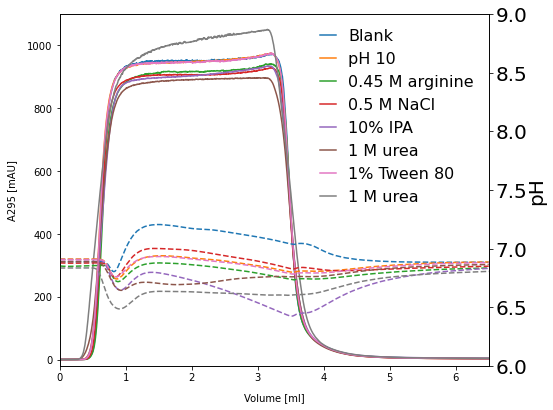

In [8]:
fig, ax = my_plot.instantiate_fig(x=8, y=6, xlabel='Volume [ml]', ylabel='A295 [mAU]')
ax2 = my_plot.get_twinx(ax, ylabel='pH')

for f in wash_files:
    name = f[f.rfind('_')+1:f.rfind(' ')]
    df = dfs[f]
    ax.plot(df.uv_295_ml, df.uv_295_mAU, label=names[name])
    ax2.plot(df.pH_ml, df.pH_pH, '--')

my_plot.set_layout(fig, ax, legend=True, fontsize=16)

ax.set_ylim(-20, 1100)
ax.set_xlim(0, 6.5)
ax2.set_ylim(6, 9)
# plt.savefig('./images/2_chromatograms_loading.png', dpi=300, bbox_inches='tight')

(16.0, 26.0)

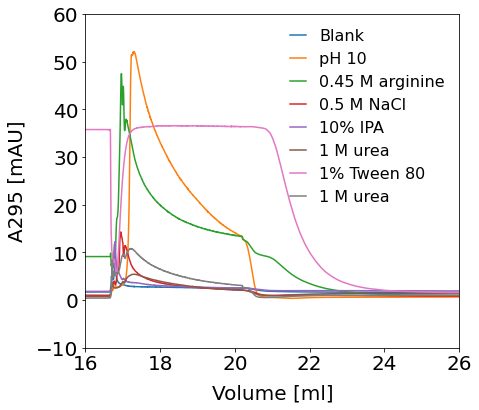

In [9]:
fig, ax = my_plot.instantiate_fig(x=7, y=6, xlabel='Volume [ml]', ylabel='A295 [mAU]')

for f in wash_files:
    name = f[f.rfind('_')+1:f.rfind(' ')]
    df = dfs[f]
    ax.plot(df.uv_295_ml, df.uv_295_mAU, label=names[name])

my_plot.set_layout(fig, ax, legend=True, fontsize=16)

ax.set_ylim(-10, 60)
ax.set_xlim(16, 26)
# ax.axvline(16.65)
# plt.savefig('./images/2_chromatograms_wash.png', dpi=300, bbox_inches='tight')

(2.0, 9.0)

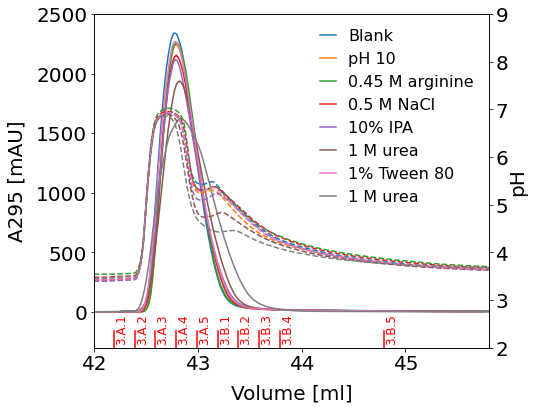

In [10]:
fig, ax = my_plot.instantiate_fig(x=8, y=6, xlabel='Volume [ml]', ylabel='A295 [mAU]')
ax2 = my_plot.get_twinx(ax, ylabel='pH')

for f in wash_files:
    name = f[f.rfind('_')+1:f.rfind(' ')]
    df = dfs[f]
    ax.plot(df.uv_295_ml, df.uv_295_mAU, label=names[name])
    ax2.plot(df.pH_ml, df.pH_pH, '--')

my_plot.set_layout(fig, ax, legend=True, fontsize=16)
my_plot.add_fractions(ax, df, text=True, xlim_times=(42, 45), akta_pure=True,
                      text_offset=0.01)

ax.set_ylim(-300, 2500)
ax.set_xlim(42, 45.8)
ax2.set_ylim(2, 9)
# plt.savefig('./images/2_chromatograms_elution.png', dpi=300, bbox_inches='tight')

(56.1, 56.5)

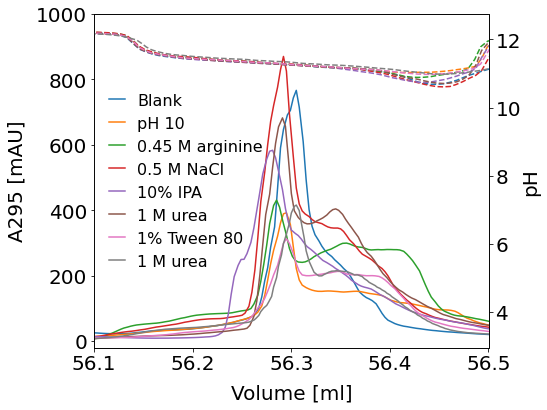

In [11]:
fig, ax = my_plot.instantiate_fig(x=8, y=6, xlabel='Volume [ml]', ylabel='A295 [mAU]')
ax2 = my_plot.get_twinx(ax, ylabel='pH')

for f in wash_files:
    name = f[f.rfind('_')+1:f.rfind(' ')]
    df = dfs[f]
    ax.plot(df.uv_295_ml, df.uv_295_mAU, label=names[name])
    ax2.plot(df.pH_ml, df.pH_pH, '--')

my_plot.set_layout(fig, ax, legend=True, fontsize=16, loc='center left')

ax.set_ylim(-20, 1000)
ax.set_xlim(56.1, 56.5)
# plt.savefig('./images/2_chromatograms_CIP.png', dpi=300, bbox_inches='tight')

# Is there a relationship between wash and CIP areas?

In [12]:
wash_masses, cip_masses, nice_names = [], [], []

for f in wash_files[:-1]:
    name = f[f.rfind('_')+1:f.rfind(' ')]
    nice_names.append(names[name])
    df = dfs[f]
    df_wash = df[(16.65 < df.uv_280_ml) & (df.uv_280_ml < 24)]
    df_cip = df[(56.1 < df.uv_280_ml) & (df.uv_280_ml < 56.5)]
    w_mass = (integrate.trapz(x=df_wash.uv_280_ml.values, y=df_wash.uv_280_mAU.values))/(1000*1.41)
    c_mass = (integrate.trapz(x=df_cip.uv_280_ml.values, y=df_cip.uv_280_mAU.values))/(1000*1.41)
    wash_masses.append(w_mass)
    cip_masses.append(c_mass)

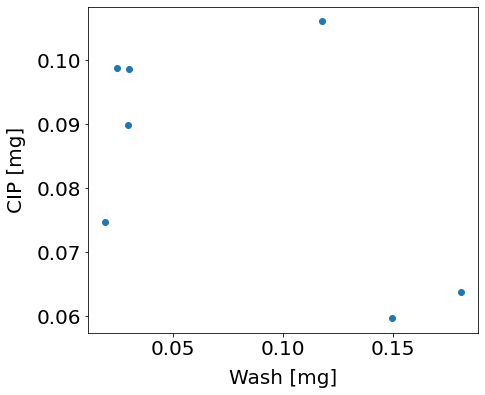

In [13]:
fig, ax = my_plot.instantiate_fig(x=7, y=6, xlabel='Wash [mg]', ylabel='CIP [mg]')
ax.scatter(wash_masses, cip_masses)

# Elution fractions

In [14]:
uv_295_max = 1282.961

In [15]:
def find_nth(haystack, needle, n):
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+len(needle))
        n -= 1
    return start

In [16]:
data_sets, sample_id_sets, df_area_sets, df_norm_sets = {}, {}, {}, {}

j = 0
for f in wash_files:
    df = dfs[f]
    name = f[f.rfind('_')+1:f.rfind(' ')]
    
    if name == '10':
        label = names[name]
        name = 'pH_10'
        n = 4
        file_path = f'./hplc_data/2022-07-12_ProA_wash_screen_{name}/'
    elif name == 'urea':
        n = 3
        j += 1
        name = f'urea {j}'
        label = names[name]
        if j == 1:
            file_path = f'./hplc_data/2022-07-12_ProA_wash_screen_urea/'
        else:
            file_path = f'./hplc_data/2022-07-22_ProA_wash_screen_urea/'
    else:
        n = 3
        label = names[name]
        file_path = f'./hplc_data/2022-07-12_ProA_wash_screen_{name}/'
    
    
    data, sample_ids = hplc.load_hplc_data(file_path, shift_baseline_time=5)
    data_sets[name] = data
    sample_id_sets[name] = sample_ids
    
    df_area = hplc.get_areas_df(data, sample_ids)
    df_norm = hplc.get_normalized_area_df(data, sample_ids)
    
    for i, cont in df_norm.iterrows():
        txt = cont.frac
        start = find_nth(txt, '_', n) + 1
        end = find_nth(txt, '_', n+1)
        
        df_area.at[i, 'frac'] = txt[start:end]
        df_norm.at[i, 'frac'] = txt[start:end]
        
        if float(txt[-3:]) == 50:
            # Account for dilution
            for species in ['large_280', 'small_280', 'mab_280', 'lmw1_280', 'lmw2_280', 'lmw3_280']:
                df_norm.at[i, species] *= 2
        
    df_area_sets[label] = df_area
    hplc.add_volume_midpoints(df_norm, df, cassette=3)
    df_norm.drop(index=[9], inplace=True)
    df_norm_sets[label] = df_norm

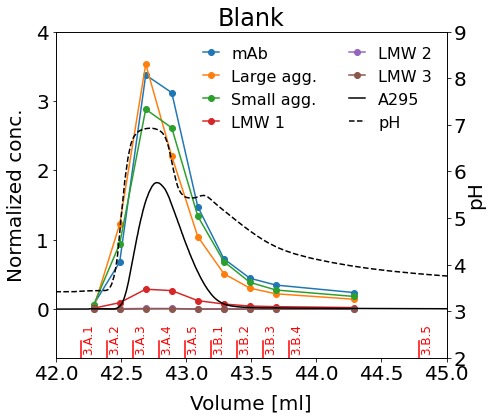

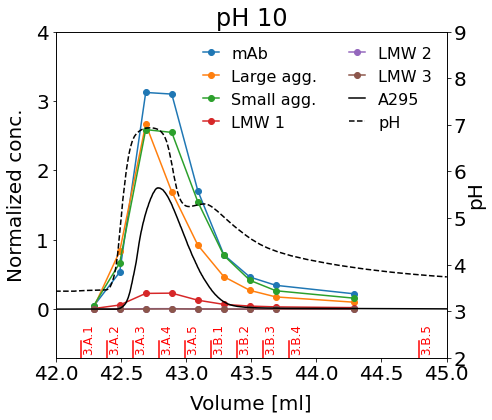

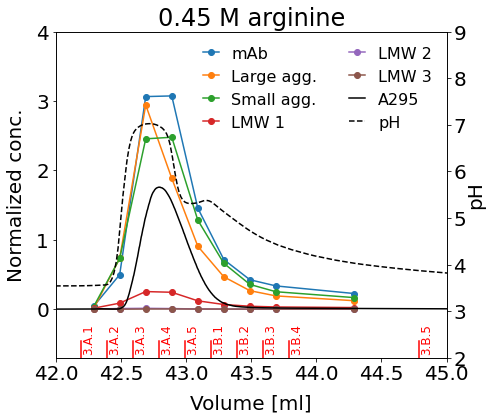

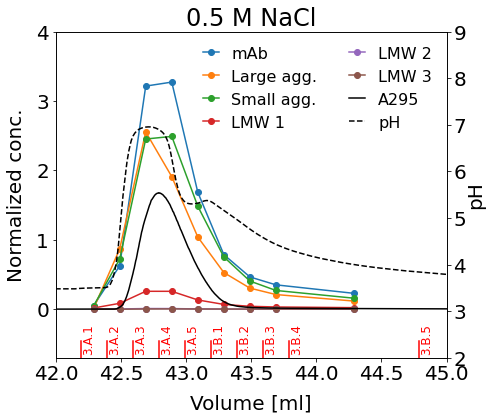

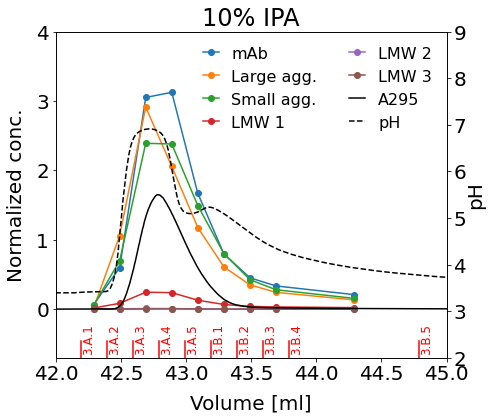

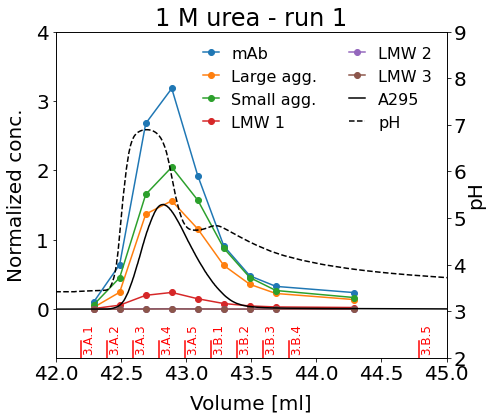

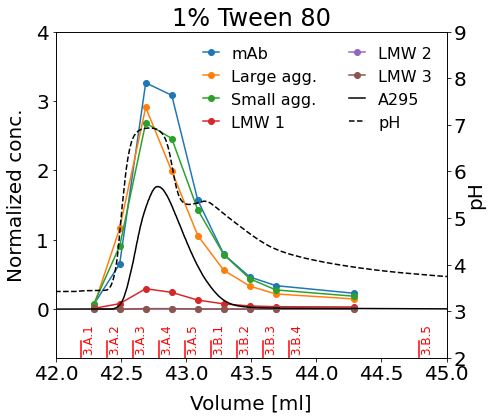

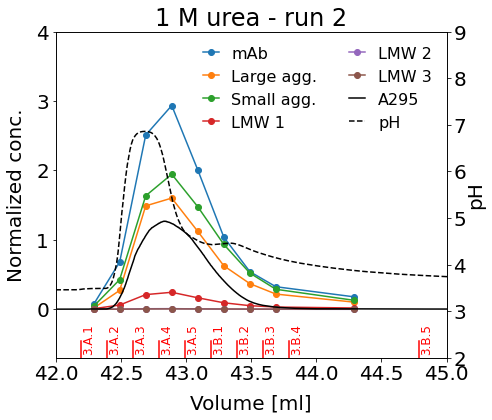

In [17]:
j = 0
for f in wash_files:
    df = dfs[f]
    name = f[f.rfind('_')+1:f.rfind(' ')]
    if name == '10':
        label = names['10']
        name = 'pH_10'
    elif name == 'urea':
        j += 1
        name = f'urea {j}'
        label = names[name]
        name = f'urea_{j}'
    else:
        label = names[name]
    df_norm = df_norm_sets[label]
    
    fig, ax = my_plot.instantiate_fig(x=7, y=6, xlabel='Volume [ml]', ylabel='Normalized conc.')
    
    ln_3 = ax.plot(df_norm.volume_midpoint_ml, df_norm.mab_280, 'o-', label='mAb')
    ln_1 = ax.plot(df_norm.volume_midpoint_ml, df_norm.large_280, 'o-', label='Large agg.')
    ln_2 = ax.plot(df_norm.volume_midpoint_ml, df_norm.small_280, 'o-', label='Small agg.')
    ln_4 = ax.plot(df_norm.volume_midpoint_ml, df_norm.lmw1_280, 'o-', label='LMW 1')
    ln_5 = ax.plot(df_norm.volume_midpoint_ml, df_norm.lmw2_280, 'o-', label='LMW 2')
    ln_6 = ax.plot(df_norm.volume_midpoint_ml, df_norm.lmw3_280, 'o-', label='LMW 3')
    
    ln_7 = ax.plot(df.uv_295_ml, df.uv_295_mAU/uv_295_max, 'k', label='A295')
    ax2 = my_plot.get_twinx(ax, ylabel='pH')
    ln_8 = ax2.plot(df.pH_ml, df.pH_pH, 'k--', label='pH')
    
    lns = ln_3 + ln_1 + ln_2 + ln_4 + ln_5 + ln_6 + ln_7 + ln_8
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, fontsize=16, handlelength=1, frameon=False, ncol=2)

    my_plot.add_fractions(ax, df, text=True, xlim_times=(42, 45), akta_pure=True, text_offset=0.01)
    ax.set_ylim(-0.7, 4)
    ax.set_xlim(42, 45)
    ax2.set_ylim(2, 9)
    plt.title(label)
#     plt.savefig(f'./images/2_elution_fracs_{name}.png', dpi=300, bbox_inches='tight')

# Elution pool compositions

In [18]:
wash_names = ['blank', 'arginine', '10', 'NaCl', 'IPA', 'tween', 'urea 1', 'urea 2']
elution_pool = ['A2', 'A3', 'A4', 'A5', 'B1']

In [19]:
percentages = []

for wash_name in wash_names:
    df_area = df_area_sets[names[wash_name]]
    df_areas_elution = df_area[df_area["frac"].isin(elution_pool)]
    sums = df_areas_elution.sum(axis=0)
    
    if wash_name == 'pH_10':
        wash_name = '10'
    temp = [wash_name, names[wash_name], sums.mab_280]
    for species in ['large_280', 'small_280', 'mab_280', 'lmw1_280', 'lmw2_280', 'lmw3_280']:
        temp.append(sums[species]/sums['total_280']*100)
    percentages.append(temp)
    
df_percentages = pd.DataFrame(percentages, columns=['wash_name', 'nice_name', 'mab_area', 'large', 'small', 'mab', 'lmw1', 'lmw2', 'lmw3'])
df_percentages['monomer_loss_percent'] = (df_percentages.at[0, 'mab_area'] - df_percentages.mab_area)/df_percentages.at[0, 'mab_area'] * 100

In [20]:
# fig, ax = my_plot.instantiate_fig(x=7, y=8, ylabel='Mass fraction [%]')
# ticks = ax.set_xticks(df_percentages.index, df_percentages.nice_name, rotation=30, ha='right', rotation_mode='anchor')
# width = 0.25
# rects_1 = ax.bar(df_percentages.index-width, df_percentages.large, width=width, label='Large agg.')
# rects_2 = ax.bar(df_percentages.index,       df_percentages.small, width=width, label='Small agg.')
# rects_3 = ax.bar(df_percentages.index+width, df_percentages.lmw1, width=width, label='LMW 1')

# ax.set_ylim(0, 2.5)
# my_plot.set_layout(fig, ax, legend=True, fontsize=16)
# # plt.savefig(f'./images/2_elution_pool_mass_fractions.png', dpi=300, bbox_inches='tight')

In [21]:
# fig, ax = my_plot.instantiate_fig(x=7, y=8, ylabel='Mass fraction or monomer loss [%]')
# ticks = ax.set_xticks(df_percentages.index, df_percentages.nice_name, rotation=30, ha='right', rotation_mode='anchor')
# width = 0.2
# rects_1 = ax.bar(df_percentages.index-1.5*width, df_percentages.large, width=width, label='Large agg.')
# rects_2 = ax.bar(df_percentages.index-0.5*width,       df_percentages.small, width=width, label='Small agg.')
# rects_3 = ax.bar(df_percentages.index+0.5*width, df_percentages.lmw1, width=width, label='LMW 1')
# rects_4 = ax.bar(df_percentages.index+1.5*width, df_percentages.monomer_loss_percent, width=width, label='Relative monomer loss')

# ax.axhline(color='black')
# my_plot.set_layout(fig, ax, legend=True, fontsize=16)
# # plt.savefig(f'./images/2_elution_pool_mass_fractions_and_mab_loss.png', dpi=300, bbox_inches='tight')

In [22]:
df_percentages.drop(index=[7], inplace=True)
df_percentages.at[6, 'nice_name'] = '1 M urea'

In [23]:
hcp_ppm = [4.57E+03, 1.14E+03, 6.91E+02, 1.13E+03, 1.59E+03, 1.63E+03, 1.76E+03]
df_percentages['hcp_ppm'] = hcp_ppm

In [24]:
df_percentages.sort_values(by=['hcp_ppm', 'large'], inplace=True, ignore_index=True, ascending=False)

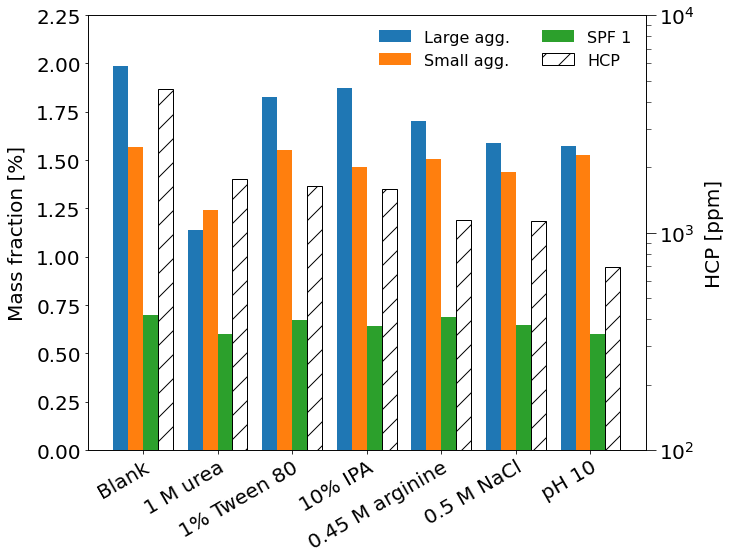

In [26]:
fig, ax = my_plot.instantiate_fig(x=10, y=8, ylabel='Mass fraction [%]')
ticks = ax.set_xticks(df_percentages.index, df_percentages.nice_name, rotation=30, ha='right', rotation_mode='anchor')
width = 0.2
rects_1 = ax.bar(df_percentages.index-1.5*width, df_percentages.large, width=width, label='Large agg.')
rects_2 = ax.bar(df_percentages.index-0.5*width,       df_percentages.small, width=width, label='Small agg.')
rects_3 = ax.bar(df_percentages.index+0.5*width, df_percentages.lmw1, width=width, label='SPF 1')

ax2 = my_plot.get_twinx(ax, ylabel='HCP [ppm]', ypad=10)
ax2.set_yscale('log')
ylim = ax2.set_ylim(1e2, 1e4)
rects_4 = ax2.bar(df_percentages.index+1.5*width, df_percentages.hcp_ppm, width=width, label='HCP', color='none', edgecolor='black', hatch='/')

lns = [rects_1, rects_2, rects_3, rects_4]
labs = [rects_1.get_label(), rects_2.get_label(), rects_3.get_label(), rects_4.get_label()]
legend = ax.legend(lns, labs, frameon=False, handlelength=2, ncol=2, fontsize=16)

ylim = ax.set_ylim(0, 2.25)
ax2.tick_params(which='major', length=10)
ax2.tick_params(which='minor', length=5)

# plt.savefig(f'./images/2_elution_pool_mass_fractions_with_ELISA.png', dpi=300, bbox_inches='tight')
plt.savefig(f'./images/2_elution_pool_mass_fractions_with_ELISA.pdf', bbox_inches='tight')

In [86]:
# df_percentages.to_csv('./Pro_A_wash_study_mass_fracs_with_elisa.csv', index=False)

With data normalized to the HCCF composition

In [87]:
# norm_vals = []
# for nice_name in df_norm_sets.keys():
#     df_norm = df_norm_sets[nice_name]
#     df_norm_elution = df_norm[df_norm["frac"].isin(elution_pool)]
#     means = df_norm_elution.mean(axis=0)
#     temp = [nice_name]
#     for species in ['large_280', 'small_280', 'mab_280', 'lmw1_280', 'lmw2_280', 'lmw3_280']:
#         temp.append(means[species])
#     norm_vals.append(temp)
# df_eluate_norms = pd.DataFrame(norm_vals, columns=['nice_name', 'large', 'small', 'mab', 'lmw1', 'lmw2', 'lmw3'])

# df_eluate_norms.drop(index=[7], inplace=True)
# df_eluate_norms.at[5, 'nice_name'] = '1 M Urea'

# for i, cont in df_eluate_norms.iterrows():
#     df_eluate_norms.at[i, 'hcp_ppm'] = df_percentages.loc[df_percentages['nice_name'] == cont.nice_name, 'hcp_ppm'].iloc[0]
# df_eluate_norms.sort_values(by=['hcp_ppm', 'large'], inplace=True, ignore_index=True, ascending=False)

In [88]:
# fig, ax = my_plot.instantiate_fig(x=10, y=8, ylabel='Normalized concentration')
# ticks = ax.set_xticks(df_eluate_norms.index, df_eluate_norms.nice_name, rotation=30, ha='right', rotation_mode='anchor')
# width = 0.2
# rects_1 = ax.bar(df_eluate_norms.index-1.5*width, df_eluate_norms.large, width=width, label='Large agg.')
# rects_2 = ax.bar(df_eluate_norms.index-0.5*width, df_eluate_norms.small, width=width, label='Small agg.')
# rects_3 = ax.bar(df_eluate_norms.index+0.5*width, df_eluate_norms.lmw1, width=width, label='SPF 1')

# ax2 = my_plot.get_twinx(ax, ylabel='HCP [ppm]', ypad=10)
# ax2.set_yscale('log')
# ylim = ax2.set_ylim(1e2, 1e4)
# rects_4 = ax2.bar(df_eluate_norms.index+1.5*width, df_eluate_norms.hcp_ppm, width=width, label='HCP', color='none', edgecolor='black', hatch='/')

# lns = [rects_1, rects_2, rects_3, rects_4]
# labs = [rects_1.get_label(), rects_2.get_label(), rects_3.get_label(), rects_4.get_label()]
# legend = ax.legend(lns, labs, frameon=False, handlelength=2, ncol=2, fontsize=16)

# ylim = ax.set_ylim(0, 2)
# ax2.tick_params(which='major', length=8)
# ax2.tick_params(which='minor', length=4)

# plt.savefig(f'./images/2_elution_pool_with_ELISA_normalized_conc.png', dpi=300, bbox_inches='tight')

In [89]:
# df_eluate_norms.to_csv('./Pro_A_wash_study_normalized_conc_with_elisa.csv', index=False)

# For manuscript

In [90]:
# Load the Akta chromatogram
df = akta.load_and_clean_csv('./Akta_data/2022-06-17_ProA_displacement.csv')
uv_295_max = df.uv_295_mAU.max()

# Load HPLC data
file_path = f'./hplc_data/2022-06-18_ProA_breakthrough/'
data, sample_ids = hplc.load_hplc_data(file_path, shift_baseline_time=5)

df_areas = hplc.get_areas_df(data, sample_ids)

# Estimate and save the peak areas in the HCCF feed
df_hccf = df_areas[df_areas.frac.str.contains('HCCF_Feed')]
hccf_areas = df_hccf.mean(axis=0)
hccf_areas = Dict(hccf_areas.to_dict())

df_norm = hplc.get_normalized_area_df(data, sample_ids)
df_norm.drop(index=[66, 67], inplace=True)
hplc.add_volume_midpoints(df_norm, df, cassette=1)

/home/chase/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3377: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


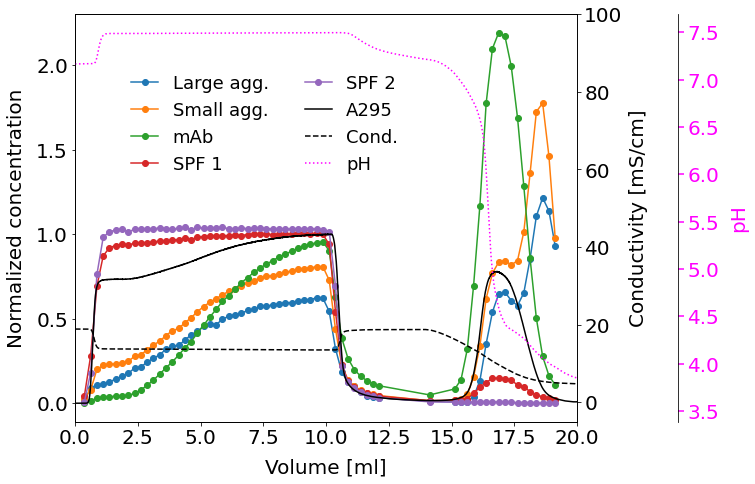

In [91]:
fig, ax = my_plot.instantiate_fig(x=9, y=7.5, xlabel='Volume [ml]', ylabel='Normalized concentration')
ax.set_xlim(0, 20)

ln_1 = ax.plot(df_norm.volume_midpoint_ml, df_norm.large_280, 'o-', label='Large agg.')
ln_2 = ax.plot(df_norm.volume_midpoint_ml, df_norm.small_280, 'o-', label='Small agg.')
ln_3 = ax.plot(df_norm.volume_midpoint_ml, df_norm.mab_280, 'o-', label='mAb')
ln_4 = ax.plot(df_norm.volume_midpoint_ml, df_norm.lmw1_280, 'o-', label='SPF 1')
ln_5 = ax.plot(df_norm.volume_midpoint_ml, df_norm.lmw2_280, 'o-', label='SPF 2')
ln_7 = ax.plot(df.uv_295_ml, df.uv_295_mAU/df.uv_295_mAU.max(), 'k', label='A295')

ax2 = my_plot.get_twinx(ax, ylabel='Conductivity [mS/cm]', ypad=7)
ax2.set_ylim(-5, 100)
ln_8 = ax2.plot(df.Cond_ml, df.Cond_mS_cm, 'k--', label='Cond.')

ax3 = ax.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
ax3.set_ylabel('pH', labelpad=10)
ln9 = ax3.plot(df.pH_ml, df.pH_pH, linestyle=':', color='magenta', label='pH')
ax3.yaxis.label.set_color('magenta')
tkw = dict(size=6, width=1.5)
ax3.tick_params(axis='y', colors='magenta', **tkw)
        
lns = ln_1 + ln_2 + ln_3 + ln_4 + ln_5 + ln_7 + ln_8 + ln9
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(0.08, 0.57), fontsize=18, ncol=2, handlelength=1.5, frameon=False)

# plt.savefig('./images/1_akta_full_chromatogram_with_fracs.png', dpi=300, bbox_inches='tight')

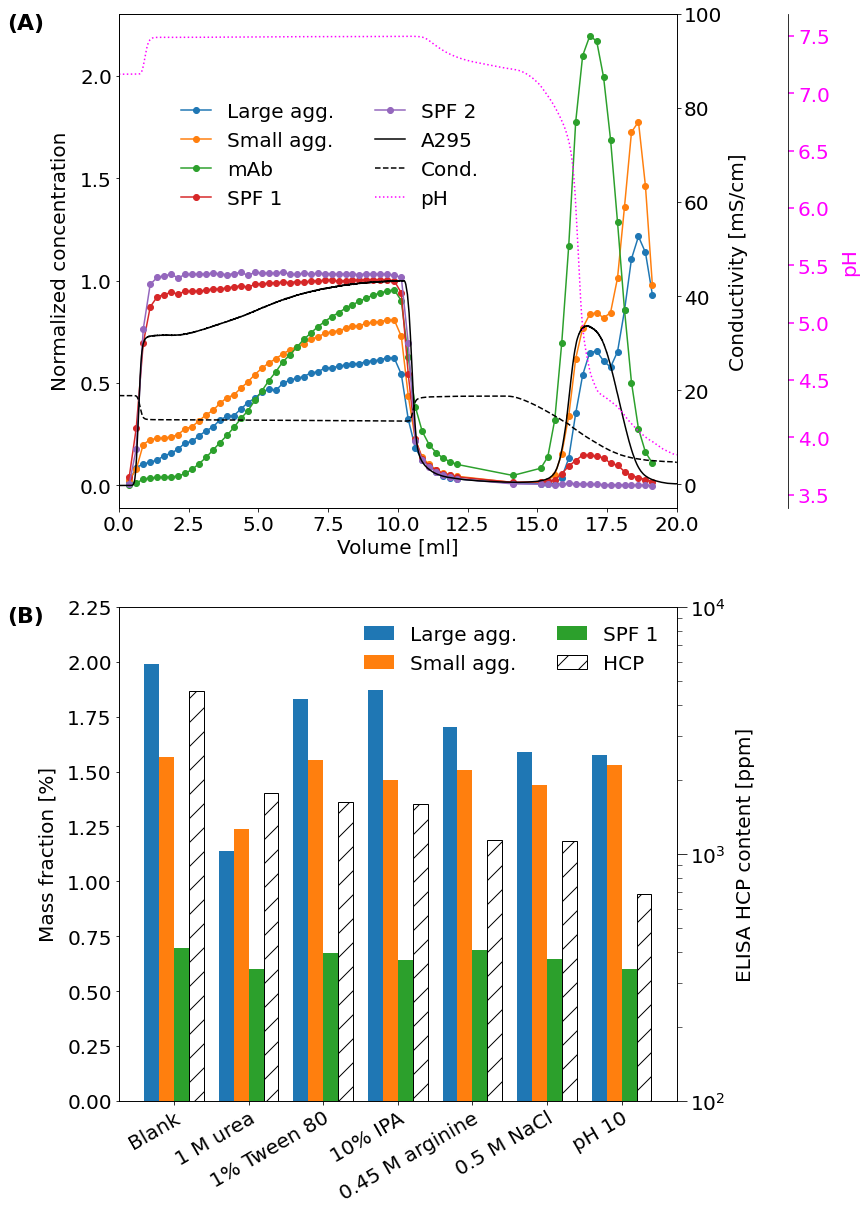

In [94]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(10, 20, forward=True)
# plt.subplots_adjust(wspace=0.02, hspace=0.02)

# ax[0]
ax[0].set_xlabel('Volume [ml]')
ax[0].set_ylabel('Normalized concentration', labelpad=10)
ax[0].set_xlim(0, 20)

ln_1 = ax[0].plot(df_norm.volume_midpoint_ml, df_norm.large_280, 'o-', label='Large agg.')
ln_2 = ax[0].plot(df_norm.volume_midpoint_ml, df_norm.small_280, 'o-', label='Small agg.')
ln_3 = ax[0].plot(df_norm.volume_midpoint_ml, df_norm.mab_280, 'o-', label='mAb')
ln_4 = ax[0].plot(df_norm.volume_midpoint_ml, df_norm.lmw1_280, 'o-', label='SPF 1')
ln_5 = ax[0].plot(df_norm.volume_midpoint_ml, df_norm.lmw2_280, 'o-', label='SPF 2')
ln_7 = ax[0].plot(df.uv_295_ml, df.uv_295_mAU/df.uv_295_mAU.max(), 'k', label='A295')

ax2 = my_plot.get_twinx(ax[0], ylabel='Conductivity [mS/cm]', ypad=7)
ax2.set_ylim(-5, 100)
ln_8 = ax2.plot(df.Cond_ml, df.Cond_mS_cm, 'k--', label='Cond.')

ax3 = ax[0].twinx()
ax3.spines["right"].set_position(("axes", 1.2))
ax3.set_ylabel('pH', labelpad=10)
ln9 = ax3.plot(df.pH_ml, df.pH_pH, linestyle=':', color='magenta', label='pH')
ax3.yaxis.label.set_color('magenta')
tkw = dict(size=6, width=1.5)
ax3.tick_params(axis='y', colors='magenta', **tkw)
        
lns = ln_1 + ln_2 + ln_3 + ln_4 + ln_5 + ln_7 + ln_8 + ln9
labs = [l.get_label() for l in lns]
ax[0].legend(lns, labs, bbox_to_anchor=(0.08, 0.57), fontsize=20, ncol=2, handlelength=1.5, frameon=False)


# ax[1]
ax[1].set_ylabel('Mass fraction [%]', labelpad=10)
ticks = ax[1].set_xticks(df_percentages.index, df_percentages.nice_name, rotation=30, ha='right', rotation_mode='anchor')
width = 0.2
rects_1 = ax[1].bar(df_percentages.index-1.5*width, df_percentages.large, width=width, label='Large agg.')
rects_2 = ax[1].bar(df_percentages.index-0.5*width, df_percentages.small, width=width, label='Small agg.')
rects_3 = ax[1].bar(df_percentages.index+0.5*width, df_percentages.lmw1, width=width, label='SPF 1')

ax2 = my_plot.get_twinx(ax[1], ylabel='ELISA HCP content [ppm]', ypad=10)
ax2.set_yscale('log')
ylim = ax2.set_ylim(1e2, 1e4)
rects_4 = ax2.bar(df_percentages.index+1.5*width, df_percentages.hcp_ppm, width=width, label='HCP', color='none', edgecolor='black', hatch='/')

lns = [rects_1, rects_2, rects_3, rects_4]
labs = [rects_1.get_label(), rects_2.get_label(), rects_3.get_label(), rects_4.get_label()]
legend = ax[1].legend(lns, labs, frameon=False, handlelength=1.5, ncol=2, fontsize=20)

ylim = ax[1].set_ylim(0, 2.25)
ax2.tick_params(which='major', length=10)
ax2.tick_params(which='minor', length=5)

text = ax[0].text(-0.2, 0.97, '(A)', transform=ax[0].transAxes, weight='bold', fontsize=22)
text = ax[1].text(-0.2, 0.97, '(B)', transform=ax[1].transAxes, weight='bold', fontsize=22)

plt.savefig(f'./images/2_Pro_A_survey_and_elution_pool_mass_fractions_with_ELISA.png', dpi=300, bbox_inches='tight')
plt.savefig(f'./images/2_Pro_A_survey_and_elution_pool_mass_fractions_with_ELISA.pdf', bbox_inches='tight')